### Latent Dirichlet Allocation (LDA)


In [19]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim.models import LsiModel
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("news_articles.csv")

In [4]:
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
articles = data["content"]

In [7]:
# lowercase, remove punctuation
articles = articles.str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

# remove stopwords
en_stopwords = set(stopwords.words("english"))
articles = articles.apply(
    lambda x: " ".join([word for word in x.split() if word not in en_stopwords])
)

# tokenize
articles = articles.apply(lambda x: word_tokenize(x))

# stemming
ps = PorterStemmer()
articles = articles.apply(lambda x: [ps.stem(word) for word in x])

In [8]:
articles

0     [dr, frank, sack, professor, nutrit, harvard, ...
1     [south, carolina, win, duke, surpris, fan, pos...
2     [want, get, brief, email, here, good, even, he...
3     [banjul, gambia, week, inaugur, anoth, countri...
4     [biggest, book, summer, isnt, blockbust, thril...
                            ...                        
95    [want, get, brief, email, here, good, even, he...
96    [tallinn, estonia, guard, brought, ahm, abdul,...
97    [gov, scott, walker, wisconsin, activ, wiscons...
98    [social, media, shook, emot, headlin, shout, n...
99    [moment, joanna, acevedo, first, set, foot, bo...
Name: content, Length: 100, dtype: object

In [9]:
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [ ]:
doc_term = [dictionary.doc2bow(doc) for doc in articles]
print(doc_term)

In [11]:
num_topics = 2
lda_model = gensim.models.LdaModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
)

In [12]:
lda_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.020*"mr" + 0.016*"said" + 0.005*"state" + 0.005*"would" + 0.004*"year"'),
 (1,
  '0.015*"mr" + 0.013*"said" + 0.009*"trump" + 0.004*"one" + 0.004*"would"')]

In [14]:
lsamodel = LsiModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=num_topics,
)

In [15]:
print(lsamodel.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]


In [26]:
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics + 1):
    models = LsiModel(
        corpus=doc_term,
        id2word=dictionary,
        num_topics=num_topics_i,
        random_seed=42,
    )
    model_list.append(models)
    coherencemodel = CoherenceModel(
        model=models, texts=articles, dictionary=dictionary, coherence="c_v"
    )
    coherence_values.append(coherencemodel.get_coherence())

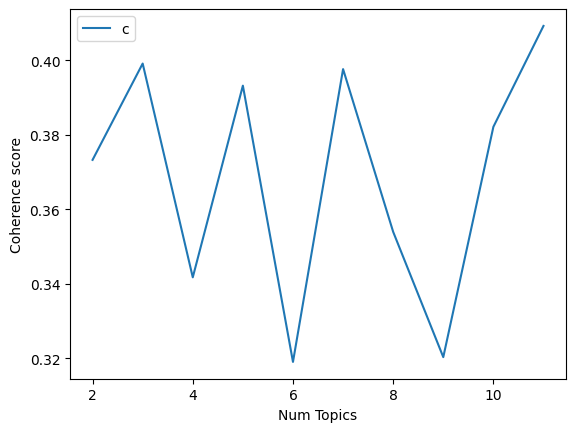

In [24]:
plt.plot(range(min_topics, max_topics + 1), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.show()

In [25]:
final_n_topics = 3
lsamodel_f = LsiModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=final_n_topics,
    random_seed=0,
)

print(lsamodel_f.print_topics(num_topics=final_n_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"'), (2, '0.460*"saudi" + 0.264*"taliban" + -0.249*"weight" + 0.194*"afghanistan" + -0.191*"dr"')]
